In [1]:
from Variables import *
from Lineshape import *
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [49]:
y_true = pd.read_csv(r"data\Baseline\2024-06-25_18h44m37s-base-RawSignal.csv",header=None)
y_true = y_true.iloc[0,1:].tolist()

window_size = 17  # Choose an odd number, e.g., 5, 7, 9, etc.

# Calculate rolling standard deviation with a moving window
errors = pd.Series(y_true).rolling(window=window_size, center=True).std()

# Handle NaN values at the edges (due to the window not being fully applied)
errors = errors.fillna(method='bfill').fillna(method='ffill')

# Convert back to numpy array if needed
errors = errors.to_numpy()

# Ensure no zero errors (for stability in the Chi-squared calculation)
errors[errors == 0] = np.min(errors[errors > 0]) * 0.1

x_array = np.linspace(211,215,500)

def ChiSquared(U,Cknob,trim,eta,Cstray,phi):
    y_sim = Baseline(x_array, U,Cknob,trim,eta,Cstray,phi)
    return np.sum(np.square((np.array(y_true) - np.array(y_sim))/(errors)))


C:\Users\Devin\AppData\Local\Temp\ipykernel_5800\1682504634.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  errors = errors.fillna(method='bfill').fillna(method='ffill')


In [50]:
print(errors)

[1.41199869e-03 1.41199869e-03 1.41199869e-03 1.41199869e-03
 1.41199869e-03 1.41199869e-03 1.41199869e-03 1.41199869e-03
 1.41199869e-03 1.42131587e-03 1.41661285e-03 1.41078528e-03
 1.40448687e-03 1.39896768e-03 1.39349986e-03 1.38784433e-03
 1.38265859e-03 1.37893440e-03 1.37503258e-03 1.37077520e-03
 1.36512373e-03 1.36052857e-03 1.35331000e-03 1.34619986e-03
 1.34031563e-03 1.33479528e-03 1.32847135e-03 1.32295578e-03
 1.31738371e-03 1.31175919e-03 1.30671083e-03 1.30103081e-03
 1.29590083e-03 1.29038197e-03 1.28594464e-03 1.28186836e-03
 1.27819442e-03 1.27220014e-03 1.26774691e-03 1.26046357e-03
 1.25271455e-03 1.24577308e-03 1.23987954e-03 1.23317354e-03
 1.22675186e-03 1.21941856e-03 1.21331805e-03 1.20822292e-03
 1.20295118e-03 1.19814752e-03 1.19205003e-03 1.18656943e-03
 1.18101809e-03 1.17630064e-03 1.16989654e-03 1.16437656e-03
 1.15736875e-03 1.14970924e-03 1.14322319e-03 1.13738456e-03
 1.13121233e-03 1.12527900e-03 1.11831684e-03 1.11229393e-03
 1.10655733e-03 1.102314

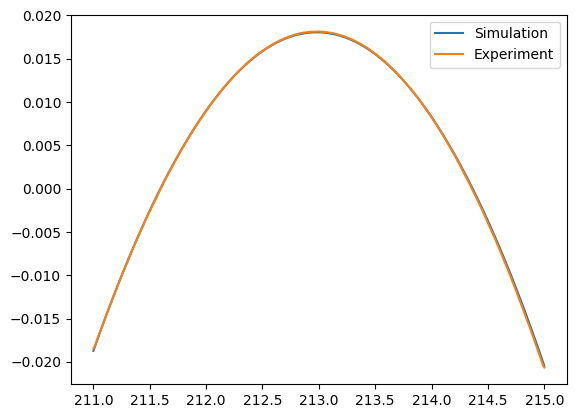

In [63]:
U = 2.4283e1
Cknob = 2.4842e-1
trim = 22/2
eta = 1.04e-2
phi = 6.1319
Cstray = 10**(-15)
# shift = -2.0464e-2
signal = Baseline(x_array,U,Cknob,eta,trim,Cstray,phi)
plt.plot(x_array,signal,label = "Simulation")
plt.plot(x_array,y_true, label = "Experiment")
plt.legend()
plt.show()

In [65]:
m = Minuit(ChiSquared,U,Cknob,trim,eta,Cstray,phi)
m.limits['U'] = (23,27)
# m.limits['Cknob'] = (.2,.3)
m.fixed['Cknob'] = True
m.fixed['trim'] = True
m.limits['eta'] = (.001,.03)
m.limits['Cstray'] = (1e-15,10e-15)
# m.limits['phi'] = (6.1,6.3)
m.fixed['phi'] = True
# m.fixed['shift'] = True
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.154e+07                  │              Nfcn = 56               │
│ EDM = 8.67e-06 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ U      │23.00000000│0.00000016 │            │            │   23    │   27    │       │
│ 1 │ Cknob  │  0.2484   │  0.0025   │            │            │         │         │  yes  │
│ 2 │ trim   │   11.00   │   0.11    │            │            │         │         │  yes  │
│ 3 │ eta    │1.0000000e-3│0.0000004e-3│            │            │  0.001  │  0.03   │       │
│ 4 │ Cstray │1.00000e-15│0.00004e-15│            │            │  1e-15  │  1e-14  │       │
│ 5 │ phi    │   6.13    │   0.06    │            │            │         │         │  yes  │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │                 U             Cknob              trim               eta            Cstray               phi │
├────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│      U │          4.53e-19                 0                 0          -0.2e-24 2.85025728083e-33                 0 │
│  Cknob │                 0                 0                 0                 0                 0                 0 │
│   trim │                 0                 0                 0                 0                 0                 0 │
│    eta │          -0.2e-24                 0                 0          7.37e-25    1.41951696e-36                 0 │
│ Cstray │ 2.85025728083e-33                 0                 0    1.41951696e-36          1.06e-43                 0 │
│    phi │                 0                 0                 0                 0                 0                 0 │
└────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

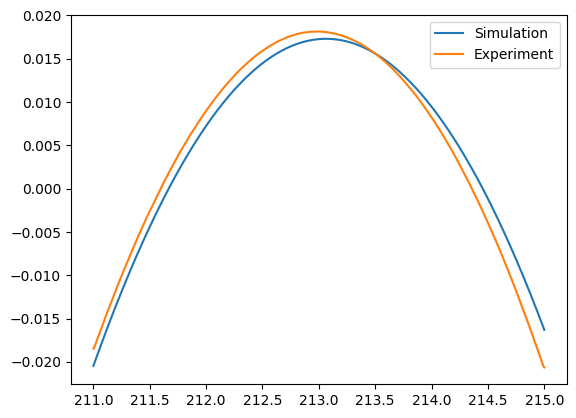

In [61]:
U = 23.00000000
# Cknob = 0.73302
Cknob = 2.4842e-1
trim = 22/2
eta = 1.0000000e-3	
phi = 6.1831853
Cstray = 1.000001e-15
# shift = -21.66e-3
signal = Baseline(x_array,U,Cknob,eta,trim,Cstray,phi)
plt.plot(x_array,signal,label = "Simulation")
plt.plot(x_array,y_true, label = "Experiment")
plt.legend()
plt.show()